In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/aoifeduna/DAT/DAT-01-21/Lectures/Unit3/data/housing.csv')

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
import seaborn as sns

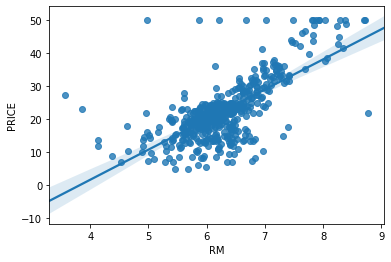

In [10]:
sns.regplot(x=df['RM'], y=df['PRICE']);

In [ ]:
# The line of best fit reduces the distance between any given point and the line itself
# If we go from 0 to 1, y is always going to increase by a certain amount. That's the slope
# y = mx+b
# Y is the slope
# x is the x values
# b is the y intercept

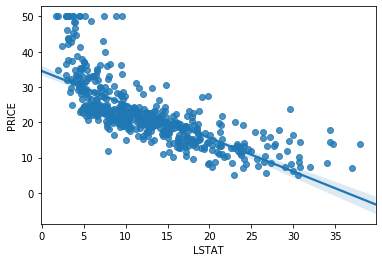

In [12]:
sns.regplot(x='LSTAT', y='PRICE', data =df);
# Percentage of the population that registered low socioeconomic status

In [13]:
from sklearn.linear_model import LinearRegression
# Importing the individual module

In [14]:
# Before you can use an algorithm you have to initialize it
# it's a class
lreg = LinearRegression()

In [15]:
lreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
X = df[['LSTAT', 'RM']]
Y = df['PRICE']
# Trying to make a prediction for y using the values in LSTAT and RM
# Considered convention to uppercase X and Y

In [24]:
lreg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lreg.coef_
# This is the slope for LSTAT
# This is the slope for Room
# Weights, slopes, and coefficients all refer to the same thing, which are these numbers

array([-0.64235833,  5.09478798])

In [19]:
lreg.intercept_
# This is the b

-1.3582728118744605

In [ ]:
# All of these values together would give us the prediction
# Trailing underscore _ available after you call fit

In [25]:
lreg.predict(x)
# Just takes anything inside of a numpy array
# Can be anything, so long as its in a numpy array

array([28.94101368, 25.48420566, 32.65907477, 32.40652   , 31.63040699,
       28.05452701, 21.28707846, 17.78559653,  8.10469338, 18.24650673,
       17.99496223, 20.73221309, 18.5534842 , 23.64474107, 23.10895823,
       22.9239452 , 24.65257604, 19.73611045, 18.9297215 , 20.57377596,
       13.51732408, 20.14832175, 17.90896697, 15.48764606, 18.35281036,
       16.56210901, 18.74440281, 18.34995811, 23.51018847, 24.94888935,
       13.23095259, 21.20092715, 11.15596625, 15.89983805, 16.63398622,
       22.65107562, 21.07107521, 22.81275431, 22.53014238, 29.46686594,
       33.15564849, 30.0244275 , 26.33937234, 25.50630935, 23.42747337,
       21.03183392, 19.03080004, 17.28696205,  6.35742724, 16.77652446,
       20.38222834, 23.73891662, 28.42223975, 23.78518476, 19.13293549,
       32.4841017 , 27.4553513 , 30.83048667, 25.54262118, 22.91599173,
       19.44389291, 19.76157796, 27.21060683, 26.99027936, 29.66411644,
       27.68813019, 21.54751591, 23.38578845, 18.73350058, 22.97

In [27]:
df['PREDICTION'] = lreg.predict(x)

In [28]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTION
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,28.941014
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.484206
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,32.659075
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,32.406520
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.630407


In [33]:
df[['LSTAT','RM']].head(1)*lreg.coef_
# Let's work through it piece by piece

,LSTAT,RM
0,-3.198945,33.498231


In [34]:
np.sum(df[['LSTAT','RM']].head(1)*lreg.coef_, axis=1)
# Add them together through the row

0    30.299286
dtype: float64

In [35]:
np.sum(df[['LSTAT','RM']].head(1)*lreg.coef_, axis=1) + lreg.intercept_
# This gives you the predictive value

0    28.941014
dtype: float64

In [36]:
lreg.score(x, y)
# This is R2
# Relates overall to the accuracy

0.6385616062603403

In [ ]:
# If you're calling columns over and over you can save them as a variable